In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
hotel_df = pd.read_csv('hotel.csv')

display(hotel_df.head())
print(hotel_df.info())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,1,July,27,1,0,0,2,...,0,0,0,C,C,3,Transient,0.0,0,0
1,Resort Hotel,0,7,1,July,27,1,0,1,1,...,0,0,0,A,C,0,Transient,75.0,0,0
2,Resort Hotel,0,13,1,July,27,1,0,1,1,...,0,0,0,A,A,0,Transient,75.0,0,0
3,Resort Hotel,0,14,1,July,27,1,0,2,2,...,0,0,0,A,A,0,Transient,98.0,0,1
4,Resort Hotel,0,0,1,July,27,1,0,2,2,...,0,0,0,C,C,0,Transient,107.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85913 entries, 0 to 85912
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85913 non-null  object 
 1   is_canceled                     85913 non-null  int64  
 2   lead_time                       85913 non-null  int64  
 3   arrival_date_year               85913 non-null  int64  
 4   arrival_date_month              85913 non-null  object 
 5   arrival_date_week_number        85913 non-null  int64  
 6   arrival_date_day_of_month       85913 non-null  int64  
 7   stays_in_weekend_nights         85913 non-null  int64  
 8   stays_in_week_nights            85913 non-null  int64  
 9   adults                          85913 non-null  int64  
 10  children                        85913 non-null  float64
 11  meal                            85913 non-null  object 
 12  market_segment                  

Text(0, 0.5, 'Total Count')

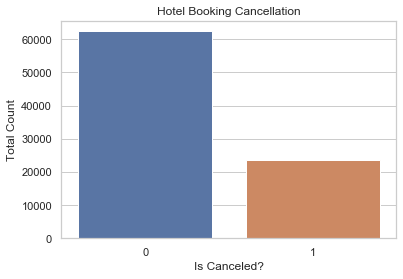

In [3]:
## Create X (features) and y(response)
X_features = hotel_df.drop('is_canceled', axis=1)
# display(X_features.head())
y_target = hotel_df.is_canceled
# display(y_target.head())


## is_cancelled

plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
ax = sns.countplot(x="is_canceled", data=hotel_df)
plt.title('Hotel Booking Cancellation')
plt.xlabel('Is Canceled?')
plt.ylabel('Total Count')

# checking frequncy of target classes
# y_target.value_counts()

## List of numerical and categorical columns:

In [4]:
num_int_type = X_features.select_dtypes(include='int64').columns.tolist()
num_float_type = X_features.select_dtypes(include='float64').columns.tolist()

num_type = num_int_type + num_float_type
print("\n\nNumerical Types columns name: \n", num_type)

cat_object_type = X_features.select_dtypes(include='object').columns.tolist()
print("\n\nCategorical Types columns name: \n", cat_object_type)



Numerical Types columns name: 
 ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests', 'children', 'adr']


Categorical Types columns name: 
 ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type']


In [5]:
## Encoding categoirical variables to numeric type - understandable to machine learning model
## scaling numerical variables with mean "0" and standard devaition "1"

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer


# Preprocessing for numerical features:
num_transformer = make_pipeline(StandardScaler(),
                                SimpleImputer(strategy='constant'))

# Preprocessing for categorical features:
cat_transformer = make_pipeline(SimpleImputer(strategy='constant'),
                                OneHotEncoder(handle_unknown='ignore'))

## Transforming both numerical and catergorical columns based preprocessing above
column_transformer = make_column_transformer((num_transformer, num_type),
                                               (cat_transformer, cat_object_type))

#check
column_transformer.fit_transform(X_features)

array([[ 3.13205884, -1.76597671,  0.01189871, ...,  0.        ,
         1.        ,  0.        ],
       [-0.84821429, -1.76597671,  0.01189871, ...,  0.        ,
         1.        ,  0.        ],
       [-0.77692582, -1.76597671,  0.01189871, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.52741616,  1.15099322,  0.59667029, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.36368976,  1.15099322,  0.59667029, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.50430535,  1.15099322,  0.59667029, ...,  0.        ,
         1.        ,  0.        ]])

### Model Evaluation

In [6]:
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import GaussianNB # Naives Bayes
from sklearn.neural_network import MLPClassifier # Neural Network


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold


In [7]:
# # split1 = KFold(n_splits=5, shuffle=False, random_state=None)
# split2 = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# # for train_ix, test_ix in split2.split(X_features, y_target):
# #     # select rows
# #     train_X, test_X = X_features.loc[train_ix], X_features.loc[test_ix]
# #     train_y, test_y = y_target[train_ix], y_target[test_ix]
# #     # summarize train and test composition
# #     train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
# #     test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
# #     print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

In [8]:
""" Training Model """
def train_model(model_steps, X_features, y_target, num_procs,  mean_score, std_dev):
    
    # split1 = KFold(n_splits=5, shuffle=False, random_state=None)
    split2 = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
    # get cross validation score for each model:
    cv_results = cross_val_score(model_steps, 
                                 X_features, y_target, 
                                 cv=split2,
                                 scoring="accuracy",
                                 n_jobs=-1)
    mean_score[model_steps] = round(np.mean(cv_results), 4)
    std_dev[model_steps] = round(np.std(cv_results), 4)
    
""" Summary of the Model """
def print_summary(model, mean_score, std_dev):
    print('\nModel:\n', model)
    print('Cross validation accuarcy score: ', mean_score[model_steps])
    print('Standard deviation during CV: ', std_dev[model_steps] )
    

In [9]:
"""
    Evaluating Models
    - Decision Trees
    - Logistic Regression
    - Naive Bayes
    - Neural Network

"""

# intialize the model list and dicts
models = []
mean_score = {}
std_dev = {}
# res = {}

# define number of processes to run in parallel
num_procs = 2

# shared model parameters
verbose_lvl = 0


# create models  
DT_model = DecisionTreeClassifier(random_state=42)
Logreg_model = LogisticRegression(random_state=42,n_jobs=-1)
GNM_model = GaussianNB()
MLP_model = MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500)


# list all models
models.extend([DT_model, Logreg_model, GNM_model, MLP_model])


# parallel cross-validate models, using mean accuracy as evaluation metric, and print summaries
print("Beginning cross validation")
for model in models:
    # pack preprocessing of data and the model in a pipeline:
    model_steps = make_pipeline(column_transformer, model)
    
    # Calling train_model()
    train_model(model_steps, X_features, y_target, num_procs, mean_score, std_dev)
    
    # Calling print_summary()
    print_summary(model, mean_score, std_dev)

Beginning cross validation

Model:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Cross validation accuarcy score:  0.758
Standard deviation during CV:  0.0045

Model:
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
Cross validation accuarcy score:  0.7871
Standard deviation during CV:  0.004

Model:
 GaussianNB(priors=None, var_smoothing=1e-09)
Cross validation 

In [10]:
X_features = column_transformer.fit_transform(X_features)
X_features

array([[ 3.13205884, -1.76597671,  0.01189871, ...,  0.        ,
         1.        ,  0.        ],
       [-0.84821429, -1.76597671,  0.01189871, ...,  0.        ,
         1.        ,  0.        ],
       [-0.77692582, -1.76597671,  0.01189871, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.52741616,  1.15099322,  0.59667029, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.36368976,  1.15099322,  0.59667029, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.50430535,  1.15099322,  0.59667029, ...,  0.        ,
         1.        ,  0.        ]])

In [11]:
# ## Splitiing hotel datasets into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, 
                                                    random_state=0, stratify=y_target)

print ("Dimension of Training Dataset: ", X_train.shape)
print(X_train)
print ("Dimension of Testing Dataset: ", X_test.shape)
print(X_test)

Dimension of Training Dataset:  (60139, 73)
[[-0.81257006 -1.76597671  1.32763477 ...  0.          1.
   0.        ]
 [-0.91950277  1.15099322 -1.3769338  ...  0.          0.
   1.        ]
 [ 4.058809    1.15099322 -0.49977642 ...  0.          1.
   0.        ]
 ...
 [ 0.16170575 -1.76597671  0.81595963 ...  0.          1.
   0.        ]
 [-0.86009571  1.15099322 -1.3769338  ...  0.          1.
   0.        ]
 [ 1.93203619  1.15099322 -0.79216221 ...  0.          1.
   0.        ]]
Dimension of Testing Dataset:  (25774, 73)
[[ 2.45481833 -0.30749174  0.88905608 ...  0.          0.
   1.        ]
 [-0.90762135  1.15099322 -0.86525866 ...  0.          1.
   0.        ]
 [ 0.12606152 -1.76597671  0.52357384 ...  0.          1.
   0.        ]
 ...
 [ 0.50626671 -0.30749174  1.47382766 ...  0.          1.
   0.        ]
 [ 1.44489829  1.15099322 -0.06119774 ...  0.          1.
   0.        ]
 [ 1.25479569  1.15099322 -0.13429419 ...  0.          1.
   0.        ]]


In [12]:
## Best chosen model from cross-validation
model = MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500)

## Using a grid search

In [13]:

from sklearn.model_selection import GridSearchCV

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [14]:
param_grid = {
    'alpha': [0.005, 0.0001],
    'momentum':[0.7, 0.9]
    }

In [15]:
grid_clf = GridSearchCV(model, param_grid, cv=10, n_jobs=-1, fit_params={'steps': [200,400]})
grid_clf.fit(X_train, y_train);

grid_clf.best_params_

{'alpha': 0.005, 'momentum': 0.7}

In [16]:
print("Best MLP-Clasifier from grid search: %f" % grid_clf.best_estimator_.score(X_test, y_test))

Best MLP-Clasifier from grid search: 0.815473


In [18]:
## Neural Networks
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500, alpha=0.005, momentum=0.7 )

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8172577015597113
[[17250  1470]
 [ 3240  3814]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     18720
           1       0.72      0.54      0.62      7054

    accuracy                           0.82     25774
   macro avg       0.78      0.73      0.75     25774
weighted avg       0.81      0.82      0.81     25774

